In [29]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
from datetime import date
import re
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from numpy import mean
from numpy import std


In [30]:
df = pd.read_csv(r'C:\Users\farah\OneDrive\Desktop\Python code\churn_dataset_farah.csv')
df

,Unnamed: 0,Pyro Code,Account Name,New or Renewal?,Outcome,Subjects,Start Date of Order,End Date of Order,Previous Start Date of Service,Previous End Date of Service,...,Additional Incentives Value,Free Months Given,Price Based on This Number of Students,Grade,"Upgrade, Downgrade, or Stayed the Same",Check-up Category,Intervention Category,Closed Lost Reason,Project Manager,Sector
0,0,1016.0,151,New,Closed Won,All,2010-04-30,2011-06-30,NaN,NaN,...,1250.00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3. Independent
1,1,1016.0,151,Renewal,Closed Won,All,2011-07-01,2012-06-30,2010-04-30,2011-06-30,...,250.00,NaN,NaN,NaN,Downgrade,NaN,NaN,NaN,NaN,3. Independent
2,2,1016.0,151,Renewal,Closed Won,All,2012-08-01,2013-08-31,2011-01-07,2012-06-30,...,250.00,NaN,NaN,NaN,Downgrade,NaN,NaN,NaN,NaN,3. Independent
3,3,1016.0,151,Renewal,Closed Won,All,2017-12-01,2019-11-30,2016-01-12,2017-11-30,...,57.08,NaN,290.0,F,Upgrade,AWAITING RENEWAL DISCUSSION,NEEDS PRIORITISATION (Medium or Low) - End,NaN,NaN,3. Independent
4,4,1016.0,151,Renewal,Closed Won,All,2015-11-01,2016-11-30,2014-01-10,2015-10-31,...,650.00,1.0,280.0,NaN,Downgrade,NaN,NaN,NaN,NaN,3. Independent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,5398,NaN,876,New,Closed Won,All,2012-12-18,2013-12-31,NaN,NaN,...,820.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2. State
5399,5399,NaN,336,New,Closed Won,All,2012-10-17,2013-10-31,NaN,NaN,...,1001.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2. State
5400,5400,NaN,336,Renewal,Closed Lost,All,NaN,NaN,2012-10-17,2013-10-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2. State
5401,5401,NaN,981,New,Closed Won,All,2014-11-17,2015-11-30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15. Individuals


In [31]:
df[['Account Name', 'Subjects', 'Start Date of Order', 'End Date of Order', 'Previous Start Date of Service', 'Previous End Date of Service']]

,Account Name,Subjects,Start Date of Order,End Date of Order,Previous Start Date of Service,Previous End Date of Service
0,151,All,2010-04-30,2011-06-30,NaN,NaN
1,151,All,2011-07-01,2012-06-30,2010-04-30,2011-06-30
2,151,All,2012-08-01,2013-08-31,2011-01-07,2012-06-30
3,151,All,2017-12-01,2019-11-30,2016-01-12,2017-11-30
4,151,All,2015-11-01,2016-11-30,2014-01-10,2015-10-31
...,...,...,...,...,...,...
5398,876,All,2012-12-18,2013-12-31,NaN,NaN
5399,336,All,2012-10-17,2013-10-31,NaN,NaN
5400,336,All,NaN,NaN,2012-10-17,2013-10-31
5401,981,All,2014-11-17,2015-11-30,NaN,NaN


In [32]:
df[['New or Renewal?', 'Outcome', 'Additional Incentives Value', 'Price Based on This Number of Students']]

,New or Renewal?,Outcome,Additional Incentives Value,Price Based on This Number of Students
0,New,Closed Won,1250.00,NaN
1,Renewal,Closed Won,250.00,NaN
2,Renewal,Closed Won,250.00,NaN
3,Renewal,Closed Won,57.08,290.0
4,Renewal,Closed Won,650.00,280.0
...,...,...,...,...
5398,New,Closed Won,820.00,NaN
5399,New,Closed Won,1001.70,NaN
5400,Renewal,Closed Lost,NaN,NaN
5401,New,Closed Won,NaN,NaN


In [33]:
df["Start Date of Order"] = pd.to_datetime(df["Start Date of Order"], format='%Y/%m/%d')
df["End Date of Order"] = pd.to_datetime(df["End Date of Order"], format='%Y/%m/%d')
df["Previous End Date of Service"] = pd.to_datetime(df["Previous End Date of Service"], format='%Y/%m/%d')
df["Previous Start Date of Service"] = pd.to_datetime(df["Previous Start Date of Service"], format='%Y/%m/%d')



In [34]:
df["Year Start"] = df["Start Date of Order"].dt.year.fillna(df["Previous Start Date of Service"].dt.year)
df["Year End"] = df["End Date of Order"].dt.year.fillna(df["Previous End Date of Service"].dt.year)
df["Year End"] = df["Year End"].astype('Int64')
df = df[df['Year End'].notna()]
df['Subscription Length'] = df['Year End'] - df['Year Start']


<ipython-input-34-c2173d5084e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subscription Length'] = df['Year End'] - df['Year Start']


In [35]:
df[['Year Start', 'Year End', 'Subscription Length']]

,Year Start,Year End,Subscription Length
0,2010.0,2011,1.0
1,2011.0,2012,1.0
2,2012.0,2013,1.0
3,2017.0,2019,2.0
4,2015.0,2016,1.0
...,...,...,...
5398,2012.0,2013,1.0
5399,2012.0,2013,1.0
5400,2012.0,2013,1.0
5401,2014.0,2015,1.0


In [36]:
df.drop(columns={'Account Name', 'Start Date of Order', 'End Date of Order', 'Previous Start Date of Service', 'Previous End Date of Service', 'Closed Lost Reason','Project Manager', 'Year Start', 'Year End'}, inplace=True)

C:\Users\farah\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
df['Price Based on This Number of Students'].fillna(df['Price Based on This Number of Students'].mean(), inplace=True)
df['Price Based on This Number of Students'] = df['Price Based on This Number of Students'].astype(np.int64)


C:\Users\farah\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-37-4d6ae928fb26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Based on This Number of Students'] = df['Price Based on This Number of Students'].astype(np.int64)


In [38]:
df = df[df['Pyro Code'].notna()]

In [39]:
df['Additional Incentives Value'].fillna(value=0, inplace=True)
df['Free Months Given'].fillna(value=0, inplace=True)
df['Free Months Given']=df['Free Months Given'].astype('Int64')
#df['Upgrade, Downgrade, or Stayed the Same'].fillna('Initial', inplace=True)
df['Check-up Category'].fillna('None', inplace=True)
df['Intervention Category'].fillna('None', inplace=True)
#df = df.drop(columns={'Closed Lost Reason'}, axis=1)
df['Subjects'].fillna('All', inplace=True)
df = df[df['Value of this Product'].notna()]
df = df[df['New or Renewal?']=='Renewal']

In [40]:
df.head(10)

,Unnamed: 0,Pyro Code,New or Renewal?,Outcome,Subjects,Value of this Product,Additional Incentives,Additional Incentives Value,Free Months Given,Price Based on This Number of Students,Grade,"Upgrade, Downgrade, or Stayed the Same",Check-up Category,Intervention Category,Sector,Subscription Length
1,1,1016.0,Renewal,Closed Won,All,1500.00,Ad Hoc Discount,250.00,0,297,NaN,Downgrade,None,None,3. Independent,1.0
2,2,1016.0,Renewal,Closed Won,All,1500.00,Ad Hoc Discount,250.00,0,297,NaN,Downgrade,None,None,3. Independent,1.0
3,3,1016.0,Renewal,Closed Won,All,5000.00,Ad Hoc Discount,57.08,0,290,F,Upgrade,AWAITING RENEWAL DISCUSSION,NEEDS PRIORITISATION (Medium or Low) - End,3. Independent,2.0
4,4,1016.0,Renewal,Closed Won,All,2150.00,Ad Hoc Discount,650.00,1,280,NaN,Downgrade,None,None,3. Independent,1.0
5,5,1016.0,Renewal,Closed Won,All,2660.00,NaN,0.00,0,280,F,Downgrade,PROJECT MANAGER RESPONSIBLE (-),Previously in intervention,3. Independent,1.0
6,6,1016.0,Renewal,Closed Won,All,2150.00,Ad Hoc Discount,559.00,0,297,NaN,Downgrade,None,None,3. Independent,1.0
7,7,1016.0,Renewal,Closed Won,All,2150.00,Ad Hoc Discount,567.00,0,280,NaN,Downgrade,None,None,3. Independent,1.0
8,8,1016.0,Renewal,Closed Won,All,5000.00,Ad Hoc Discount,781.51,0,294,E,Upgrade,PROJECT MANAGER RESPONSIBLE (-),Previously in intervention,3. Independent,2.0
9,15,1023.0,Renewal,Closed Won,All,3577.44,Ad Hoc Discount,1651.76,0,340,E,Downgrade,MISSING LEAD - HEAD LETTER SENT,NEEDS PRIORITISATION (Medium or Low) - Midpoint,1. Academy,1.0
10,14,1023.0,Renewal,Closed Won,All,3551.25,NaN,0.00,0,355,NaN,Upgrade,None,None,1. Academy,1.0


In [41]:
df_dum = pd.get_dummies(df['Upgrade, Downgrade, or Stayed the Same'])
df = pd.concat([df, df_dum], axis=1)

df_dum2 = pd.get_dummies(df['Intervention Category'])
df = pd.concat([df, df_dum2], axis=1)

df=df.drop(columns={'New or Renewal?','Upgrade, Downgrade, or Stayed the Same', 'Intervention Category'})



In [42]:
df = df.apply(lambda df: le.fit_transform(df.astype(str)), axis=0, result_type='expand')

In [43]:
le = LabelEncoder()
balance_data = df.apply(le.fit_transform)
                                  
X = df.drop('Outcome', axis = 1) 
y = df['Outcome']

kf = KFold(n_splits=7, random_state=11, shuffle=True)
kf.get_n_splits(X)

7

In [44]:
df.head()

,Unnamed: 0,Pyro Code,Outcome,Subjects,Value of this Product,Additional Incentives,Additional Incentives Value,Free Months Given,Price Based on This Number of Students,Grade,...,High ? End,High ? Midpoint,Low ? End,Low ? Midpoint,Med ? End,Med ? Midpoint,NEEDS PRIORITISATION (Medium or Low) - End,NEEDS PRIORITISATION (Medium or Low) - Midpoint,None,Previously in intervention
1,0,0,1,0,218,0,175,0,173,12,...,0,0,0,0,0,0,0,0,1,0
2,710,0,1,0,218,0,175,0,173,12,...,0,0,0,0,0,0,0,0,1,0
3,1341,0,1,0,1221,0,324,0,167,6,...,0,0,0,0,0,0,1,0,0,0
4,1892,0,1,0,398,0,352,1,158,12,...,0,0,0,0,0,0,0,0,1,0
5,2292,0,1,0,564,24,0,0,158,6,...,0,0,0,0,0,0,0,0,0,1


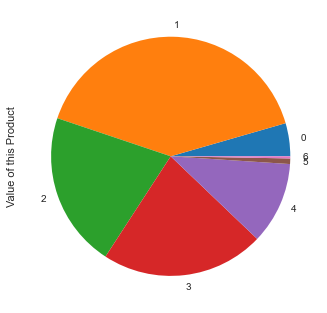

In [45]:
df.groupby(['Subscription Length']).sum().plot(kind='pie', y='Value of this Product' , legend = False)

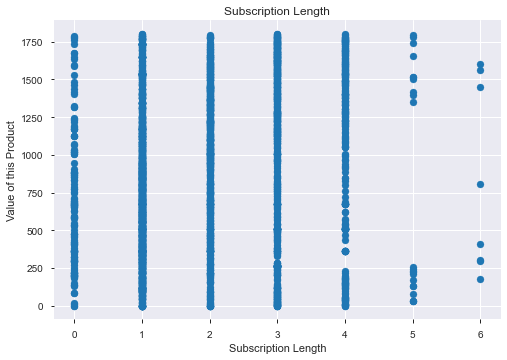

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df['Subscription Length'], df['Value of this Product'])
plt.title('Subscription Length')
plt.xlabel('Subscription Length')
plt.ylabel('Value of this Product')
plt.show()

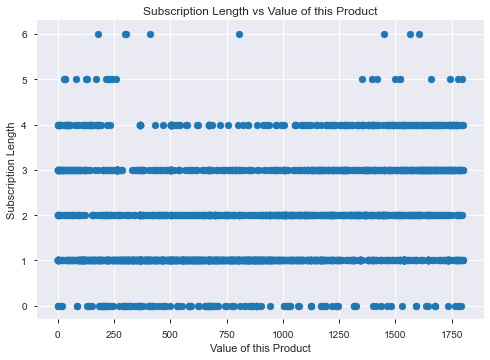

In [47]:
import matplotlib.pyplot as plt
plt.scatter(df['Value of this Product'], df['Subscription Length'])
plt.title('Subscription Length vs Value of this Product')
plt.xlabel('Value of this Product')
plt.ylabel('Subscription Length')
plt.show()

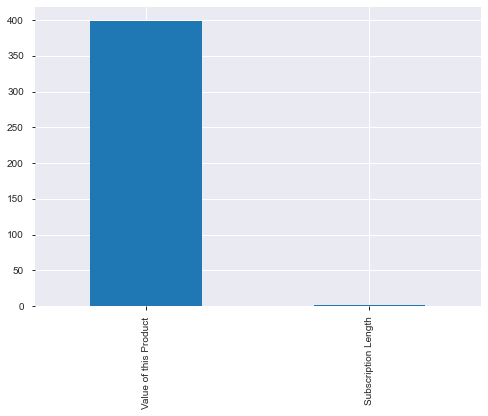

In [48]:
plt.figure();
df[['Value of this Product', 'Subscription Length']].iloc[5].plot(kind='bar');

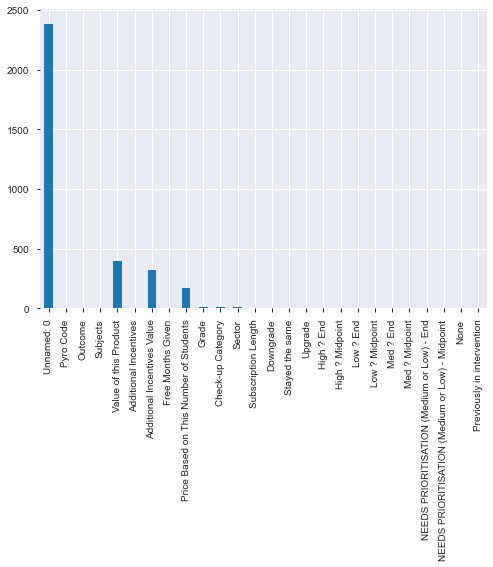

In [49]:
plt.figure();
df.iloc[5].plot(kind='bar');

In [50]:
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [51]:
#Logistic Regression model
#Create the model
model = LogisticRegression(max_iter=10000)
#Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [52]:
#Check LR results scores on predictions
predictions_lr = model.predict(X_test)
print(classification_report(y_test, predictions_lr))
print("Accuracy:",metrics.accuracy_score(y_test, predictions_lr))



              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       1.00      1.00      1.00       279

    accuracy                           1.00       383
   macro avg       1.00      1.00      1.00       383
weighted avg       1.00      1.00      1.00       383

Accuracy: 0.9973890339425587


In [53]:
sc = StandardScaler()
X_train_rf = sc.fit_transform(X_train)
X_test_rf = sc.transform(X_test)
#Create model
clf=RandomForestClassifier(n_estimators=200)
#Train model
clf.fit(X_train_rf,y_train)

RandomForestClassifier(n_estimators=200)

In [54]:
#Check RF results scores on predictions
predictions_rf =clf.predict(X_test_rf)
print(classification_report(y_test, predictions_rf))
print("Accuracy:",metrics.accuracy_score(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       104
           1       1.00      0.99      1.00       279

    accuracy                           0.99       383
   macro avg       0.99      1.00      0.99       383
weighted avg       0.99      0.99      0.99       383

Accuracy: 0.9947780678851175


In [55]:
#Adaboost classifier model
#Create model
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
#Train model
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [56]:
#Check Adaboost results scores on predictions
predictions_ada =ada.predict(X_test)
print(classification_report(y_test, predictions_rf))
print("Accuracy:",metrics.accuracy_score(y_test, predictions_rf))



              precision    recall  f1-score   support

           0       0.98      1.00      0.99       104
           1       1.00      0.99      1.00       279

    accuracy                           0.99       383
   macro avg       0.99      1.00      0.99       383
weighted avg       0.99      0.99      0.99       383

Accuracy: 0.9947780678851175


In [57]:
gb = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gb, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.997 (0.004)


In [58]:
import sklearn 
from sklearn import cluster 
from sklearn.cluster import KMeans 

In [59]:
CreateCluster = [] 
K_mean = range(5, 20)

for kmean in K_mean: 
    K_meanModel = KMeans(n_clusters=kmean)
    K_meanModel.fit(df)
    CreateCluster.append(K_meanModel.inertia_)

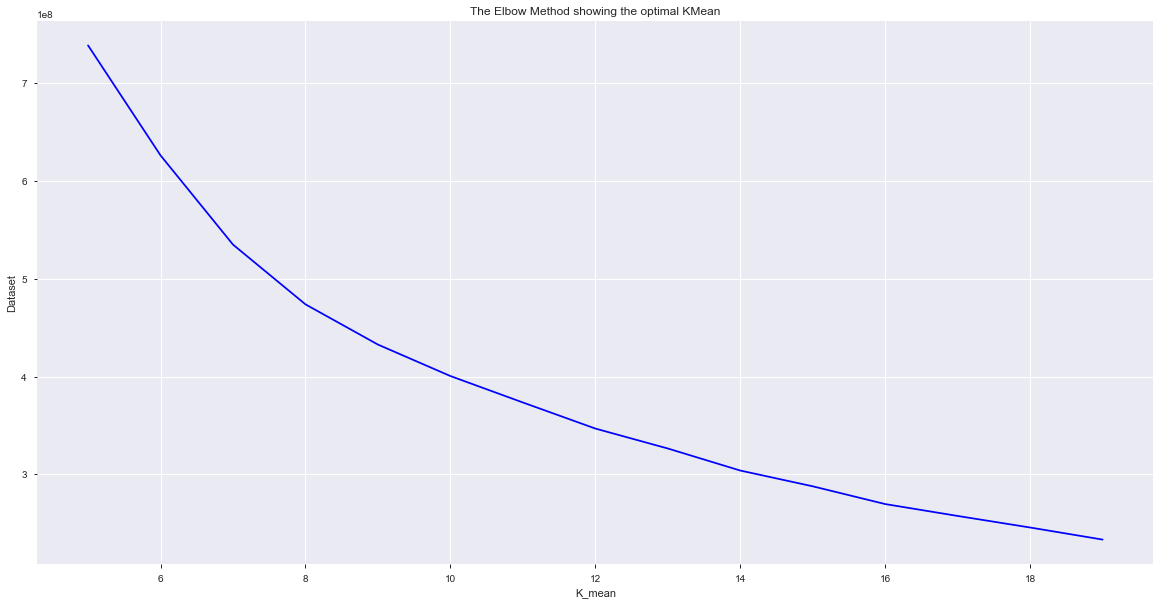

In [60]:
plt.figure(figsize=(20,10))
plt.plot(K_mean, CreateCluster, 'bx-')
plt.xlabel('K_mean')
plt.ylabel('Dataset')
plt.title('The Elbow Method showing the optimal KMean')
plt.show()